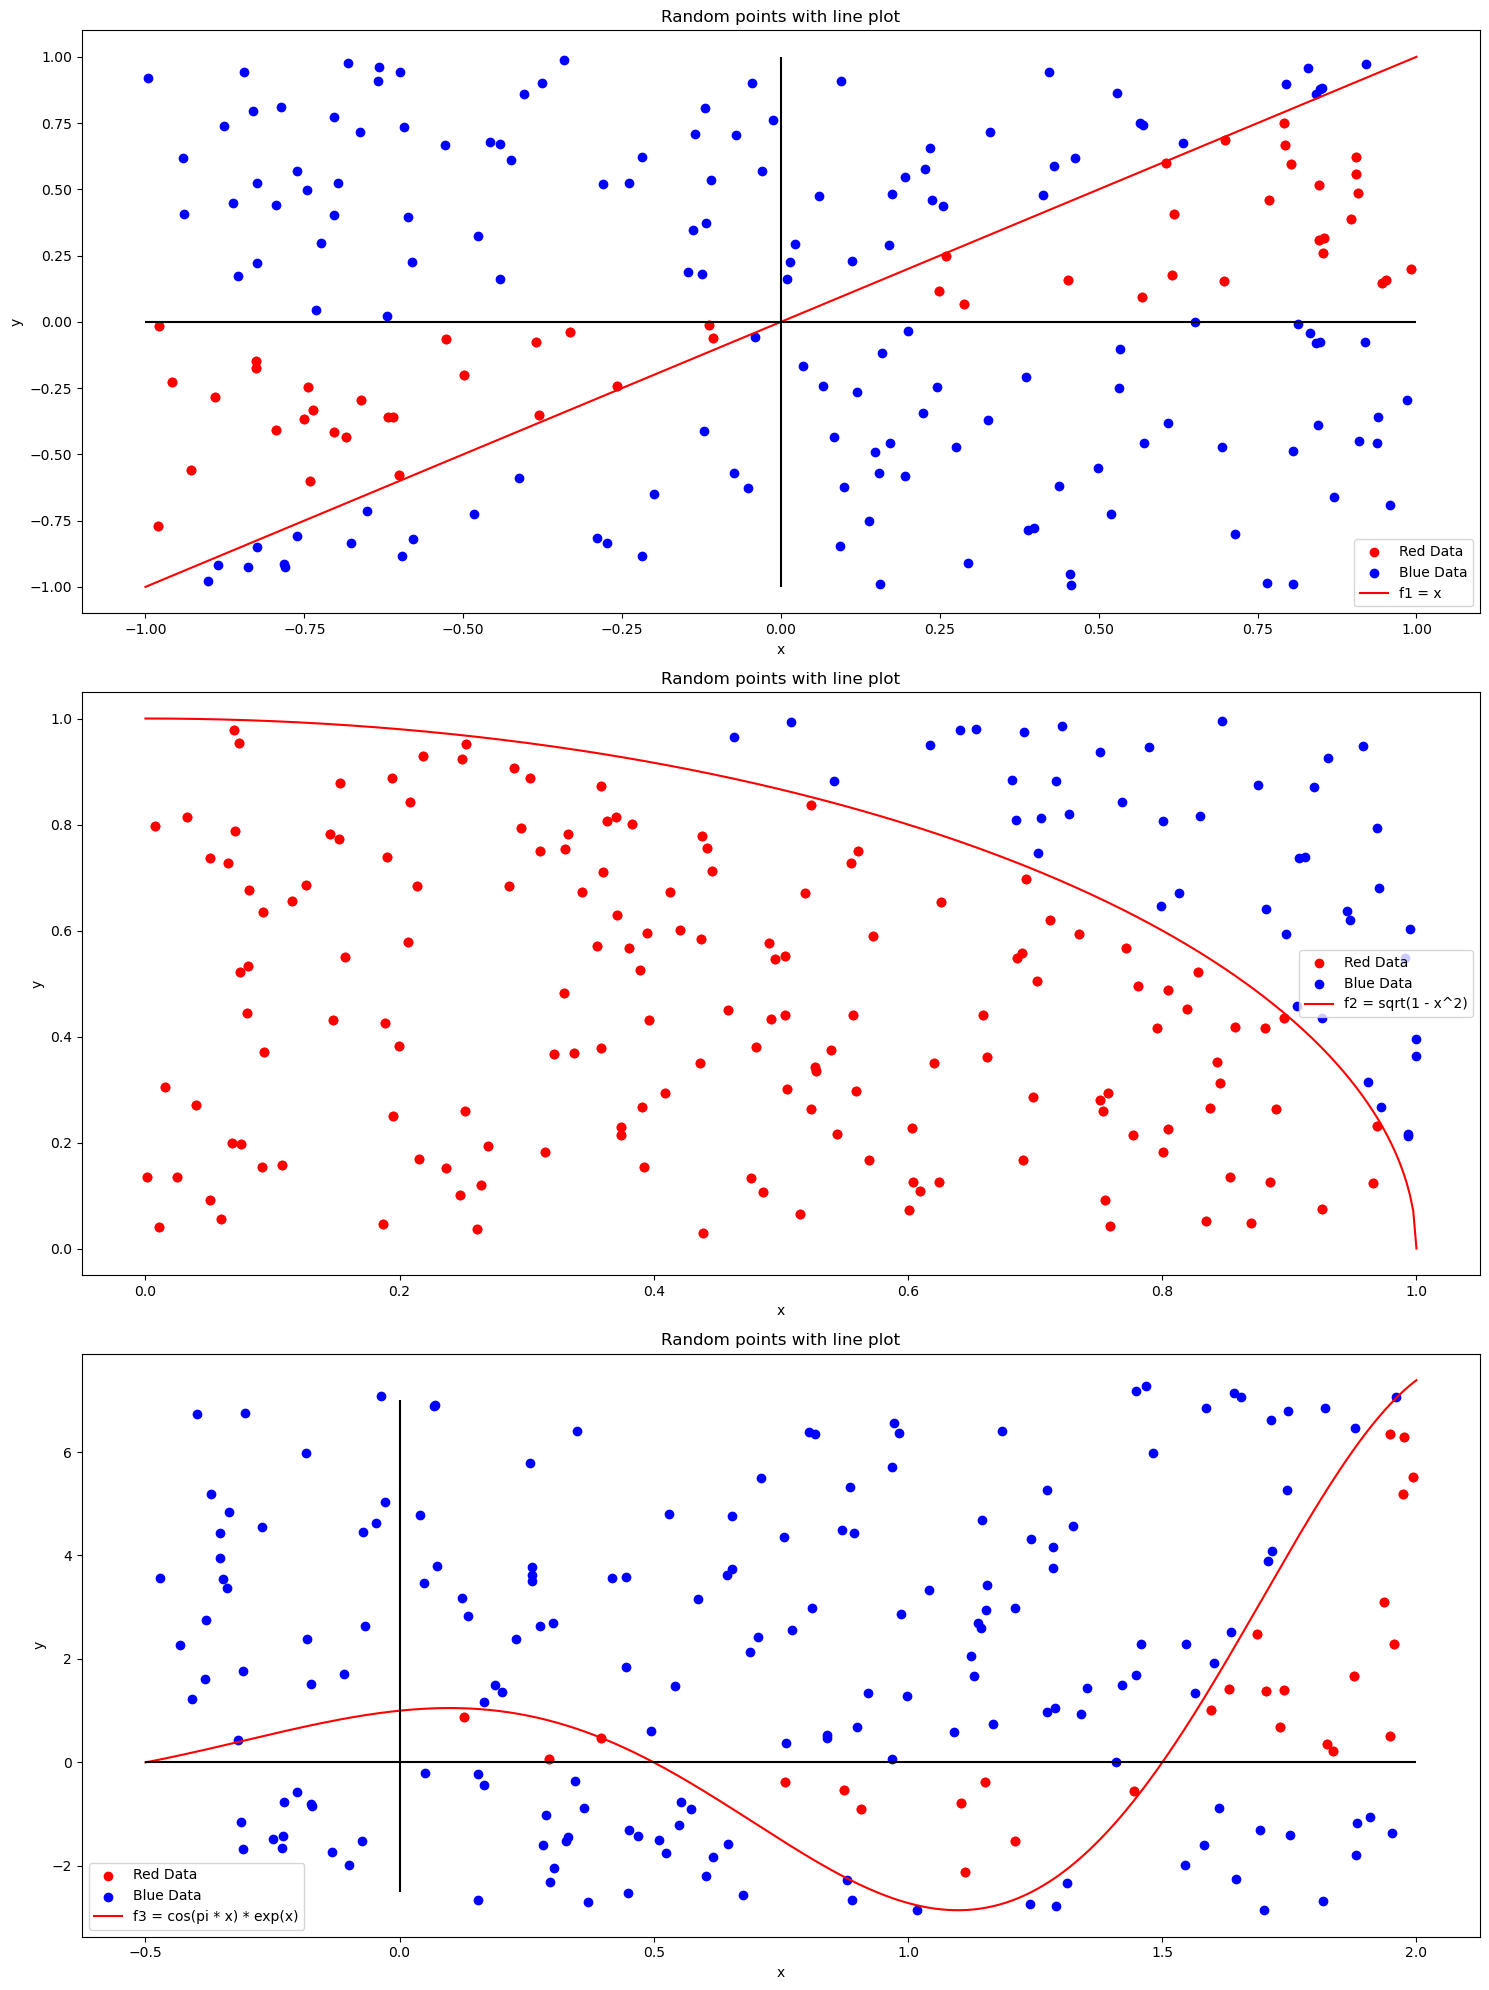

In [25]:
#----------------------------------------------------{PART 1}-------------------------------------------------------------------
# impoting libraries:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Defining functions:
def f_1(x): return x

def f_2(x): return np.sqrt(1 - x ** 2)

def f_3(x): return np.cos(np.pi * x) * np.exp(x)

# functions in the list for easy use:
fun_list = [f_1, f_2, f_3]

# Boundaries for the x-axis relative to the functions
Bounds = [(-1, 1), (0, 1), (-0.5, 2)]

# random generator: generates points in between the desired range
def random_generator(x_min, x_max, fun, M=400):
    x_points = np.random.uniform(x_min, x_max, M)  # Generate M random points within given bounds
    y_points = np.random.uniform(np.min(fun(x_points)), np.max(fun(x_points)), M)  # Generate y-values within function range
    return x_points, y_points

# initiating subplots for the functions f1, f2, f3 respectively
fig, axes = plt.subplots(3, 1, figsize=(15, 20))

# Function names for legend labels
function_names = ['f1 = x', 'f2 = sqrt(1 - x^2)', 'f3 = cos(pi * x) * exp(x)']

# Looping through subplots
for i, ax in enumerate(axes):
    
    M = 400  # Here the number of data points is 400
    x_set = np.linspace(*(Bounds[i]), M)
    
    f = fun_list[i]  # this is for every function f1, f2, and f3   
    x_data, y_data = random_generator(*Bounds[i], f, 200)  # Generating random data points using random_generator

    # If point lands above the function or below the x-axis, mark it as red
    red_points = ((y_data < f(x_data)) & (y_data > 0)) | ((y_data > f(x_data)) & (y_data < 0))

    ax.scatter(x_data[red_points], y_data[red_points], label='Red Data', color="red")  # Plotting data points
    ax.scatter(x_data[~red_points], y_data[~red_points], label='Blue Data', color="blue")  # Plotting data points
    ax.plot(x_set, f(x_set), color='red', label=f'{function_names[i]}')  # Plotting the functions as lines

    ax.scatter(x_data[red_points], y_data[red_points], color='red')  # Plotting the points in the regions of interest in red
    
    # Drawing/plotting xy lines passing through point(0,0) depending on the x and y range
    if i == 0: 
        ax.vlines(0, -1, 1, color="black")
        ax.hlines(0, -1, 1, color="black")
    elif i == 2:
        ax.vlines(0, -2.5, 7, color="black")
        ax.hlines(0, -0.5, 2, color="black")
    
    ax.set_title("Random points with line plot")  # Adding title to the plot
    ax.set_xlabel("x")  # Adding x label
    ax.set_ylabel("y")  # Adding y label
    ax.legend()  
    
plt.savefig('Tut_4_p1_I123_mkfman002.png')
fig.tight_layout()
plt.show()


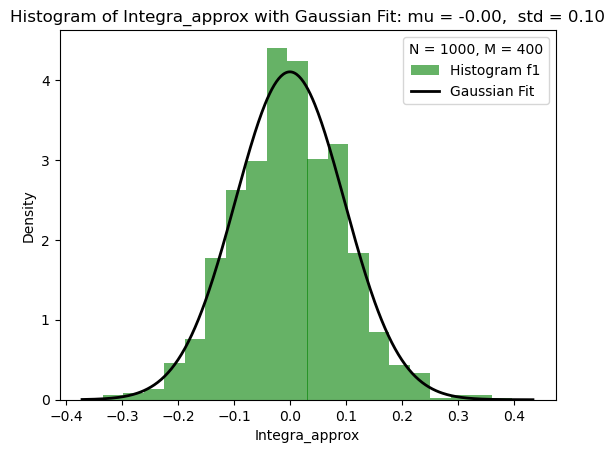

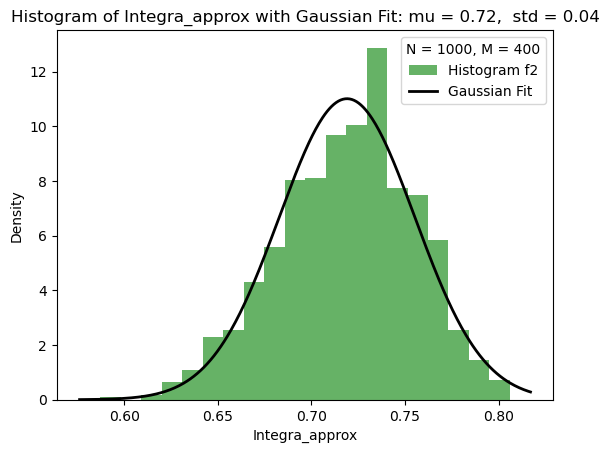

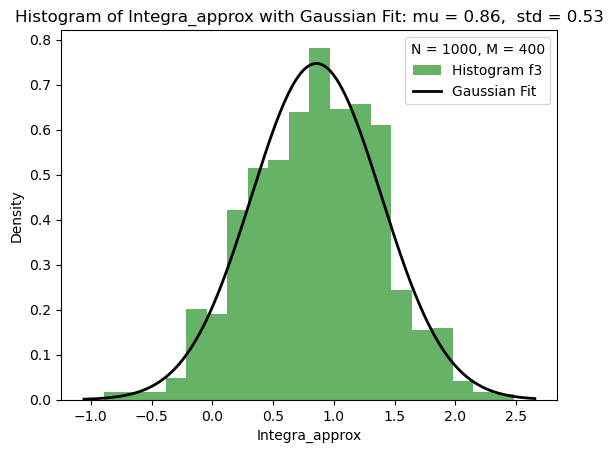

In [36]:
#------------------------------------------------PART 2------------------------------------------------------------------------
# Plot histograms for each function
for i, f in enumerate(fun_list):
    store_integrals_appx = Monte_Integration_apprx(Bounds[i], f, 400)

    # Plot histogram of stored integrals with normalization
    plt.hist(store_integrals_appx, bins=20, density=True, alpha=0.6, color='g', label=f'Histogram f{i+1}')

    # Fit a normal distribution to the data
    mu, std = norm.fit(store_integrals_appx)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 400)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, color = "black", linewidth=2, label='Gaussian Fit')

    # Add labels and title
    plt.xlabel('Integra_approx')
    plt.ylabel('Density')
    plt.title(f'Histogram of Integra_approx with Gaussian Fit: mu = {mu:.2f},  std = {std:.2f}')

    # Adding legend with N and M
    plt.legend(title='N = 1000, M = 400')

    # Saving plot with different filename for each function
    plt.savefig(f'tut_4_p2_I{i+1}_mkfman002.png')

    # Show plot
    plt.show()



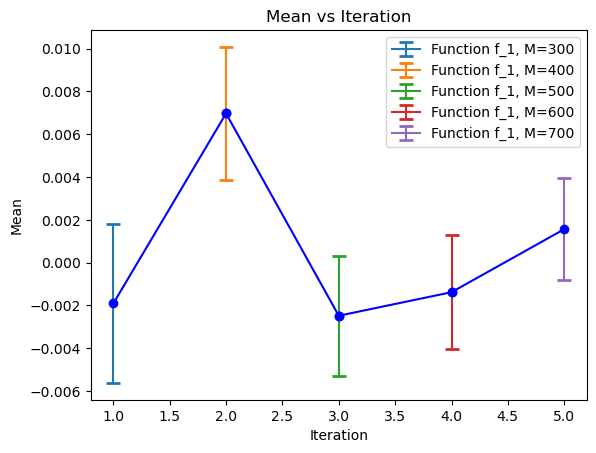

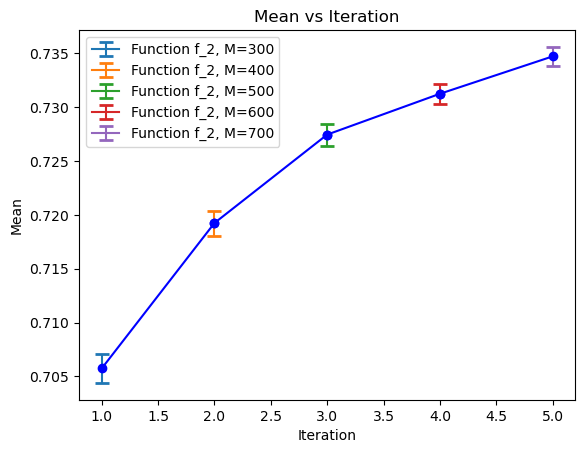

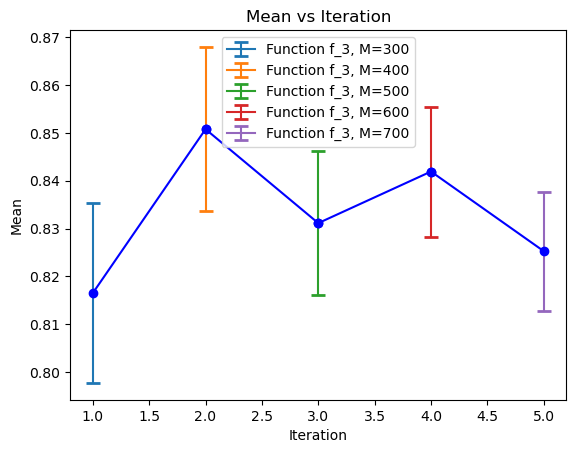

In [34]:
#---------------------------------------------PART 3----------------------------------------------------------------------------

# iterating monde carlo_Integration_approximation 5 times with different M's for each function:

def iterate_monte_carlo_outer(f, Bounds, M_values, filename='monte_carlo_plot.png'):
    N_iterations = len(M_values)  # Number of iterations based on the length of M_values
    for i, M in enumerate(M_values, start=1):
        nested_monte = Monte_Integration_apprx(Bounds, f, M)  # Performing Monte Carlo integration
        
        # Calculating mean, standard deviation, and uncertainty
        mean_ = np.mean(nested_monte)
        std = np.std(nested_monte)
        uncertainty = std / np.sqrt(len(nested_monte) - 1)
        
        # Plottung error bar
        plt.errorbar(i, mean_, yerr=uncertainty, capsize=5, capthick=2, label=f'Function {f.__name__}, M={M}')
        
        # Plotting connecting line  of errorbar 
        if i > 1:
            plt.plot([i-1, i], [prev_mean, mean_], marker='o', linestyle='-', color='blue')  # Connect means with a line
        
        prev_mean = mean_  # Updating previous mean for next iteration
    
    # Adding labels and title
    plt.xlabel('Iteration')
    plt.ylabel('Mean')
    plt.title('Mean vs Iteration')
    plt.legend()
    
    # Saving and showing plot
    plt.savefig(filename)
    plt.show()

# iterating 5 times with different M for eac function on thier respective bounds
M_values = [300, 400, 500, 600, 700]  # values of M
iterate_monte_carlo_outer(f_1, Bounds[0], M_values, filename='tut_4_p3_I1_mkfman002.png')
iterate_monte_carlo_outer(f_2, Bounds[1], M_values, filename='tut_4_p3_I2_mkfman002.png')
iterate_monte_carlo_outer(f_3, Bounds[2], M_values, filename='tut_4_p3_I3_mkfman002.png')
